In [ ]:
pip install --upgrade scikit-learn


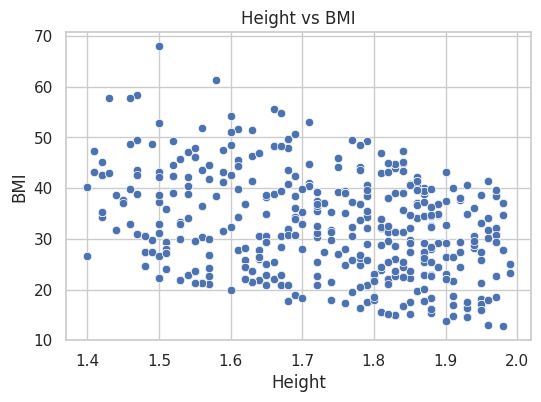

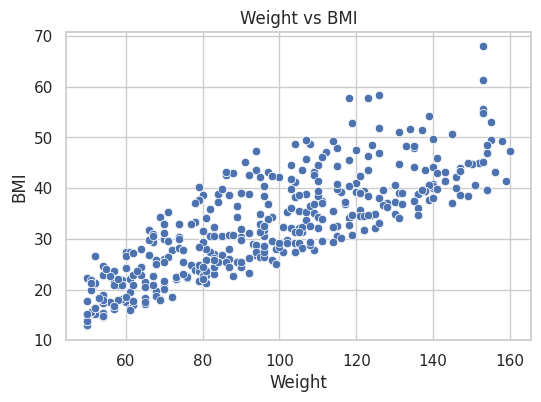

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean data
df = pd.read_csv("combined_diabetes_with_bmi.csv")
df.columns = df.columns.str.strip().str.lower()

# Select needed columns and drop missing
cols = ['height', 'weight', 'age', 'bmi']
df = df[cols].dropna()

sns.set(style="whitegrid")

# Plot height vs bmi
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['height'], y=df['bmi'])
plt.title('Height vs BMI')
plt.xlabel('Height')
plt.ylabel('BMI')
plt.show()

# Plot weight vs bmi
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['weight'], y=df['bmi'])
plt.title('Weight vs BMI')
plt.xlabel('Weight')
plt.ylabel('BMI')
plt.show()




In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

# Load and clean data
df = pd.read_csv("with_bmi.csv")

# Keep only necessary columns and drop missing values
df = df[['Weight', 'BMI', 'Height', 'Gender']].dropna()

# Encode Gender column (Male=0, Female=1)
le_gender = LabelEncoder()
df['Gender_encoded'] = le_gender.fit_transform(df['Gender'])

# Define features and target
X = df[['Weight', 'Height', 'Gender_encoded']]  # Features: Weight, Height, Gender_encoded
y = df['BMI']                                   # Target: BMI

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Show model performance
print(f"Model trained using 'weight', 'height', and 'gender' to predict 'BMI'")
print(f"R² Score on test data: {r2:.4f}\n")

# --- Take weight, height, and gender as user input ---
try:
    user_weight = float(input("Enter weight in kg: "))
    user_height = float(input("Enter height in meters: "))
    user_gender = input("Enter gender (Male/Female): ").strip().capitalize()

    if user_gender not in le_gender.classes_:
        print(f"Invalid gender input. Please enter 'Male' or 'Female'.")
    else:
        gender_encoded = le_gender.transform([user_gender])[0]
        predicted_bmi = model.predict([[user_weight, user_height, gender_encoded]])
        print(f"Predicted BMI for weight {user_weight} kg, height {user_height} m, and gender {user_gender} is: {predicted_bmi[0]:.2f}")
except Exception as e:
    print("Invalid input. Please enter correct numerical values and gender.")


Model trained using 'weight', 'height', and 'gender' to predict 'BMI'
R² Score on test data: 0.9714

Enter weight in kg: 45
Enter height in meters: 1.9
Enter gender (Male/Female): Male
Predicted BMI for weight 45.0 kg, height 1.9 m, and gender Male is: 7.30


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv("with_bmi.csv")

# Use only valid rows
df = df[['Weight', 'Height', 'Index', 'Gender']].dropna()
df['Index'] = df['Index'].astype(int)

# Encode Gender: Male -> 0, Female -> 1
gender_map = {'Male': 0, 'Female': 1}
df['Gender'] = df['Gender'].map(gender_map)

# Features and target
X = df[['Weight', 'Height', 'Gender']]
y = df['Index']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {acc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# BMI categories
bmi_categories = {
    0: "Extremely Weak",
    1: "Weak",
    2: "Normal",
    3: "Overweight",
    4: "Obesity"
}

# Ask user for height, weight, and gender
try:
    user_weight = float(input("Enter weight in kg: "))
    user_height = float(input("Enter height in meters: "))
    user_gender = input("Enter gender (Male/Female): ").capitalize()

    if user_gender not in gender_map:
        raise ValueError("Gender must be 'Male' or 'Female'")

    gender_value = gender_map[user_gender]
    predicted_class = model.predict([[user_weight, user_height, gender_value]])[0]
    category = bmi_categories.get(predicted_class, "Unknown")
    print(f"\nPredicted BMI Category: {category} (Class {predicted_class})")

except Exception as e:
    print(f"Invalid input. Error: {e}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/loc

Logistic Regression Accuracy: 0.7400

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         4
           2       0.64      0.78      0.70        18
           3       0.30      0.38      0.33         8
           4       0.86      0.60      0.71        30
           5       0.85      1.00      0.92        39

    accuracy                           0.74       100
   macro avg       0.44      0.46      0.44       100
weighted avg       0.73      0.74      0.72       100

Enter weight in kg: 56
Enter height in meters: 1.9
Enter gender (Male/Female): Male

Predicted BMI Category: Normal (Class 2)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("with_bmi.csv")

# Drop rows with missing values
df = df.dropna()

# Encode categorical features (Gender)
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])

# Define features and target
X = df[['Height', 'Weight', 'Gender']]
y = df['BMI']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train KNN regressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on test set
y_pred = knn.predict(X_test)

# Evaluate model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"KNN Regression R² Score: {r2:.4f}")
print(f"Root Mean Squared Error: {rmse:.2f}\n")

# --- Take user input and predict BMI ---
try:
    user_height = float(input("Enter height in meters: "))
    user_weight = float(input("Enter weight in kg: "))
    user_gender = input("Enter gender (Male/Female): ").capitalize()

    if user_gender not in le_gender.classes_:
        print("Invalid gender input. Please enter 'Male' or 'Female'.")
    else:
        gender_encoded = le_gender.transform([user_gender])[0]
        predicted_bmi = knn.predict([[user_height, user_weight, gender_encoded]])
        print(f"Predicted BMI for height {user_height} m, weight {user_weight} kg, gender {user_gender}: {predicted_bmi[0]:.2f}")
except Exception as e:
    print("Invalid input. Please enter numeric values for height and weight, and a valid gender.")


KNN Regression R² Score: 0.7905
Root Mean Squared Error: 6.95

Enter height in meters: 1.7
Enter weight in kg: 57
Enter gender (Male/Female): Female
Predicted BMI for height 1.7 m, weight 57.0 kg, gender Female: 20.64


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv("diabetes_prediction_dataset.csv")
df = df.dropna()

# Encode categorical variables
label_encoders = {}
categorical_cols = ['gender', 'smoking_history']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Features and target
X = df.drop(columns=['diabetes', 'hypertension', 'heart_disease'])  # as in your code
y = df['diabetes']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict on test set (optional evaluation)
y_pred = nb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --- User input for prediction ---
try:
    print("\nEnter patient details to predict diabetes:")

    # Numeric inputs
    age = int(input("Age: "))
    bmi = float(input("BMI: "))
    HbA1c_level = float(input("HbA1c level: "))
    blood_glucose = float(input("Blood glucose level: "))

    # Categorical inputs with encoding
    gender_input = input("Gender (Male/Female): ").capitalize()
    smoking_input = input("Smoking history (never/former/current/some days/always): ").lower()

    if gender_input not in label_encoders['gender'].classes_:
        raise ValueError(f"Invalid gender: {gender_input}")
    if smoking_input not in label_encoders['smoking_history'].classes_:
        raise ValueError(f"Invalid smoking history: {smoking_input}")

    gender_enc = label_encoders['gender'].transform([gender_input])[0]
    smoking_enc = label_encoders['smoking_history'].transform([smoking_input])[0]

    # Prepare input for prediction
    input_features = [[
        gender_enc,
        age,
        smoking_enc,
        bmi,
        HbA1c_level,
        blood_glucose
    ]]

    prediction = nb_model.predict(input_features)[0]
    result = "Diabetic" if prediction == 1 else "Non-diabetic"
    print(f"\nPredicted diabetes status: {result} (Class {prediction})")

except Exception as e:
    print(f"Input error: {e}")


Naive Bayes Accuracy: 0.9554

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.83      0.60      0.70      1708

    accuracy                           0.96     20000
   macro avg       0.90      0.79      0.84     20000
weighted avg       0.95      0.96      0.95     20000


Enter patient details to predict diabetes:
Age: 60
BMI: 43.42
HbA1c level: 6.7
Blood glucose level: 120
Gender (Male/Female): Male
Smoking history (never/former/current/some days/always): never

Predicted diabetes status: Diabetic (Class 1)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names

